In [128]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Model
import socket
import os
import cv2

In [97]:
def load_images_flat_directory(directory, image_size=(96, 96)):
    images = []
    image_names = os.listdir(directory)
    valid_extensions = ('.jpg', '.jpeg', '.png')  # Specify valid image extensions

    for img_name in image_names:
        img_path = os.path.join(directory, img_name)
        
        # Filter by valid extensions
        if not img_name.lower().endswith(valid_extensions):
            print(f"Skipping {img_name}: Unsupported file extension.")
            continue
        
        # Read and preprocess the image
        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Unable to read image {img_path}. Skipping...")
            continue
        
        img = cv2.resize(img, image_size)  # Resize to consistent dimensions
        img = img / 255.0  # Normalize pixel values to [0, 1]

        images.append(img)
    
      # Convert list to NumPy array
    print(f"Loaded {len(images)} images.")
    return images

In [98]:

image_size = (96, 96)  # Dimensions for the CNN
data_dir_arjun = "arjun_new"
data_dir_manoj = "manoj_new"
X_train = load_images_flat_directory(data_dir_arjun, image_size)
X_train_man = load_images_flat_directory(data_dir_manoj, image_size)
X_train.extend(X_train_man)
X_train = np.asarray(X_train)

y_train = [0]*15
y_train.extend([1]*8)
y_train = np.asarray(y_train)

print(f"Shape of X: {X_train.shape}")
print(f"Shape of y: {y_train.shape}")

Loaded 15 images.
Loaded 8 images.
Shape of X: (23, 96, 96, 3)
Shape of y: (23,)


In [99]:
def grayscale(img):
    # Convert image to uint8 if it isn't already
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def preprocessing(img):
    img = grayscale(img)
    img = img/255
    return img

X_train = np.array(list(map(preprocessing, X_train)))
X_train = X_train.reshape(23, 96, 96, 1)
print(X_train.shape)
print(y_train.shape)

y_train = to_categorical(y_train, 2)

(23, 96, 96, 1)
(23,)


In [100]:
def leNet():
    model = Sequential()
    model.add(Conv2D(60, (5,5), input_shape=(96, 96, 1), activation='relu'))
    model.add(Conv2D(60, (5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(30, (3,3), activation='relu'))
    model.add(Conv2D(30, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [101]:
datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

datagen.fit(X_train)

In [102]:
model = leNet()
history = model.fit(datagen.flow(X_train, y_train, batch_size=50), steps_per_epoch=2000, epochs=50, shuffle=1)

Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 2us/step - accuracy: 0.4783 - loss: 0.6936  
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 3us/step - accuracy: 0.6522 - loss: 0.6754     
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.6522 - loss: 0.6712     
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.6522 - loss: 0.6307     
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.6522 - loss: 0.6445     
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.6087 - loss: 0.6055     
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.6522 - loss: 0.6056     
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.7391 - loss: 0.6122     
Epoch 9/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.8261 - loss: 0.5102     
Epoch 10/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.8261 - loss: 0.4132     
Epoch 11/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.782

In [126]:
from PIL import Image
img = Image.open('Photoon.jpg')
img = np.asarray(img)
img = cv2.resize(img, (96, 96))
img = preprocessing(img)
print(img.shape)
img = img.reshape(1, 96, 96, 1)
 
#Test image
predict_x=model.predict(img) 
classes_x=str(np.argmax(predict_x,axis=1))
if str(classes_x) == '[0]':
    print("Predicted person: Arjun")
else:
    print("Predicted person: Manoj")

(96, 96)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted person: Arjun


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(1, 92, 92, 60)
(1, 92, 92, 60)


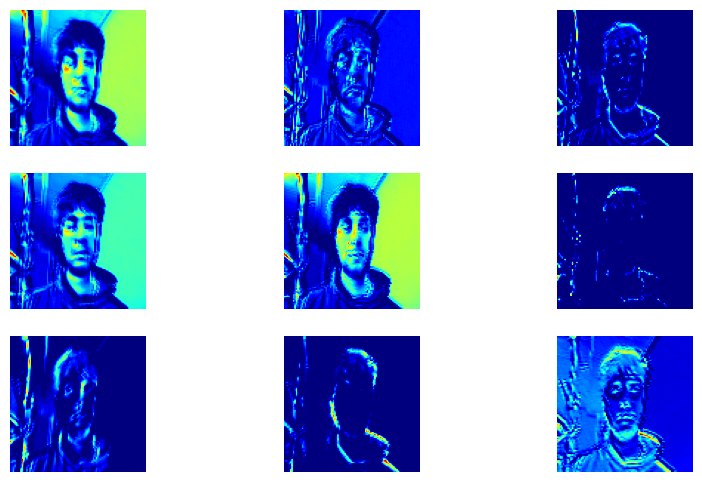

In [127]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer1.predict(img)
print(visual_layer1.shape)
print(visual_layer2.shape)

plt.figure(figsize=(10,6))
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

In [135]:
score = model.evaluate(X_train, y_train)

print('Test accuracy:', score[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 1.0000 - loss: 0.0027
Test accuracy: 1.0
